<a href="https://colab.research.google.com/github/SaravanavelE/ML_mini_project/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [3]:
#import the dataset
d=pd.read_csv("/content/drive/MyDrive/4thSem/MLOps/Dataset/heart.csv")
d.head()

,General_Health,Exercise,Depression,Diabetes,Sex,Age_Category,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Heart_Disease
0,Poor,No,No,No,Female,70-74,32.66,14.54,Yes,No,No
1,Very Good,No,No,Yes,Female,70-74,77.11,28.29,No,No,Yes
2,Very Good,Yes,No,Yes,Female,60-64,88.45,33.47,No,No,No
3,Poor,Yes,No,Yes,Male,75-79,93.44,28.73,No,Yes,Yes
4,Good,No,No,No,Male,80+,88.45,24.37,Yes,Yes,No


In [4]:
d.isna().sum()

,0
General_Health,0
Exercise,0
Depression,0
Diabetes,0
Sex,0
Age_Category,0
Weight_(kg),0
BMI,0
Smoking_History,0
Alcohol_Consumption,0


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = ['Smoking_History', 'Alcohol_Consumption', 'General_Health', 'Exercise', 'Depression', 'Diabetes', 'Sex','Heart_Disease']

for col in categorical_cols:
    d[col] = le.fit_transform(d[col])
d.head()

,General_Health,Exercise,Depression,Diabetes,Sex,Age_Category,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Heart_Disease
0,3,0,0,0,0,70-74,32.66,14.54,1,0,0
1,4,0,0,1,0,70-74,77.11,28.29,0,0,1
2,4,1,0,1,0,60-64,88.45,33.47,0,0,0
3,3,1,0,1,1,75-79,93.44,28.73,0,1,1
4,2,0,0,0,1,80+,88.45,24.37,1,1,0


In [14]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
def convert_age_category(age):
    if '+' in age:
        return int(age.replace('+', ''))
    elif '-' in age:
        parts = age.split('-')
        return (int(parts[0]) + int(parts[1])) / 2
    else:
        return int(age)

d['Age_Category'] = d['Age_Category'].apply(convert_age_category)

numerical_cols = ['Age_Category', 'Weight_(kg)', 'BMI']
scaler = MinMaxScaler()
d[numerical_cols] = scaler.fit_transform(d[numerical_cols])

d.to_csv('preprocessed_dataset.csv', index=False)


In [15]:
x = d[['General_Health', 'Exercise', 'Depression', 'Diabetes', 'Sex', 'Age_Category', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption']]
y = d['Heart_Disease']
x.head(),y.head()

(   General_Health  Exercise  Depression  Diabetes  Sex  Age_Category  \
 0               3         0           0         0    0      0.864407   
 1               4         0           0         1    0      0.864407   
 2               4         1           0         1    0      0.694915   
 3               3         1           0         1    1      0.949153   
 4               2         0           0         0    1      1.000000   
 
    Weight_(kg)       BMI  Smoking_History  Alcohol_Consumption  
 0     0.000000  0.012715                1                    0  
 1     0.328845  0.376954                0                    0  
 2     0.412740  0.514172                0                    0  
 3     0.449656  0.388609                0                    1  
 4     0.412740  0.273113                1                    1  ,
 0    0
 1    1
 2    0
 3    1
 4    0
 Name: Heart_Disease, dtype: int64)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
x_pred = model.predict(x_train)  # Predict for all x_train values

In [20]:
y_pred= model.predict(x_test)

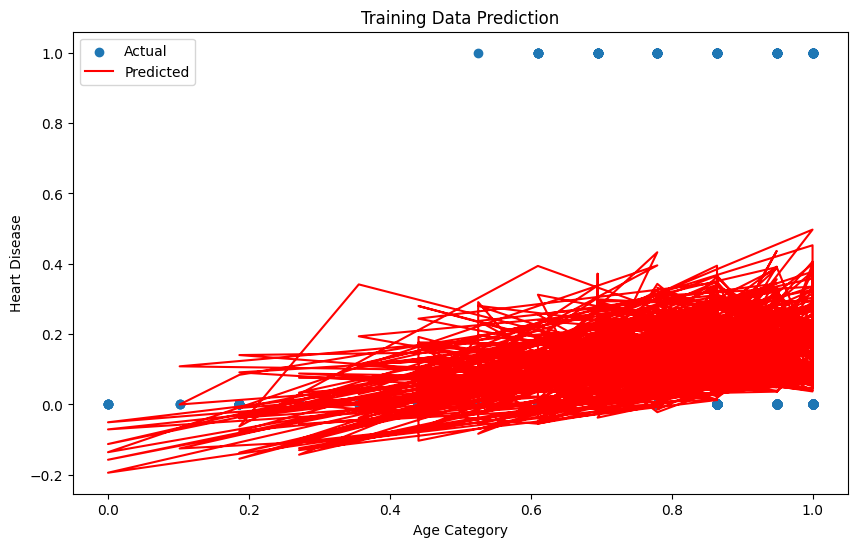

In [23]:
import matplotlib.pyplot as plt

# Training plot
plt.figure(figsize=(10, 6))
plt.scatter(x_train['Age_Category'], y_train, label='Actual') # Example using 'Age_Category'
plt.plot(x_train['Age_Category'], x_pred, color='red', label='Predicted')
plt.xlabel('Age Category')
plt.ylabel('Heart Disease')
plt.title('Training Data Prediction')
plt.legend()
plt.show()

In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.1215067570831522
Mean Absolute Error (MAE): 0.2368582621998369
R-squared (R2): 0.04700582679880605


In [31]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import warnings

# Suppress the specific warning related to feature names
warnings.filterwarnings("ignore", message="X does not have valid feature names, but LinearRegression was fitted with feature names")

print("Select options for the following features:")

general_health = input("General Health (Poor, Fair, Good, Very Good, Excellent): ").strip().lower()
exercise = input("Exercise (Yes/No): ").strip().lower()
depression = input("Depression (Yes/No): ").strip().lower()
diabetes = input("Diabetes (Yes/No): ").strip().lower()
sex = input("Sex (Male/Female): ").strip().lower()
age_category_input = float(input("Enter Age Category (e.g., 30-40): "))
weight_input = float(input("Enter Weight (kg, e.g., 60): "))
bmi_input = float(input("Enter BMI (e.g., 22.5): "))
smoking_history = input("Smoking History (Never, Former, Current, Occasional): ").strip().lower()
alcohol_consumption = input("Alcohol Consumption (None, Low, Moderate, High): ").strip().lower()

categories = {
    'general_health': ['poor', 'fair', 'good', 'very good', 'excellent'],
    'exercise': ['no', 'yes'],
    'depression': ['no', 'yes'],
    'diabetes': ['no', 'yes'],
    'sex': ['male', 'female'],
    'smoking_history': ['never', 'former', 'current', 'occasional'],
    'alcohol_consumption': ['none', 'low', 'moderate', 'high']
}

encoder = LabelEncoder()

encoded_inputs = [
    encoder.fit(categories['general_health']).transform([general_health])[0],
    encoder.fit(categories['exercise']).transform([exercise])[0],
    encoder.fit(categories['depression']).transform([depression])[0],
    encoder.fit(categories['diabetes']).transform([diabetes])[0],
    encoder.fit(categories['sex']).transform([sex])[0],
    age_category_input, weight_input, bmi_input,
    encoder.fit(categories['smoking_history']).transform([smoking_history])[0],
    encoder.fit(categories['alcohol_consumption']).transform([alcohol_consumption])[0]
]

scaler = MinMaxScaler()

numerical_values = np.array([[age_category_input, weight_input, bmi_input]])

scaled_values = scaler.fit_transform(numerical_values)

encoded_inputs[5:8] = scaled_values[0]

user_input = np.array([encoded_inputs])

predicted_heart_disease = model.predict(user_input)[0]
result = "Yes" if predicted_heart_disease == 1 else "No"

print(f"Predicted Heart Disease risk: {result}")


Select options for the following features:
General Health (Poor, Fair, Good, Very Good, Excellent): Good
Exercise (Yes/No): No
Depression (Yes/No): No
Diabetes (Yes/No): No
Sex (Male/Female):  Male
Enter Age Category (e.g., 30-40): 19
Enter Weight (kg, e.g., 60): 42
Enter BMI (e.g., 22.5): 23
Smoking History (Never, Former, Current, Occasional): Never
Alcohol Consumption (None, Low, Moderate, High): None
Predicted Heart Disease risk: No
